In [167]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 16})
rc('text',usetex=True)

## EJERCICIO 01. NUMERAL A.

In [168]:
def function(x): #TRASCENDENTAL FUNCTION FOR X DERIVED FROM: \frac{\partial I}{\partial \lambda} = 0

    function = 5*np.exp(x) - 5 - x*np.exp(x) #IS EQUAL TO 0
    return function

In [169]:
def derivative(x): #DERIVATIVE OF THE TRASCENDENTAL FUNCTION FOR X

    derivative = 4*np.exp(x) - x*np.exp(x) #IS ALSO EQUAL TO 0
    return derivative

In [170]:
x_initial = 5 #INITIAL GUESS: lim(x->inf) {function} = 5
x_final = x_initial - (function(x_initial) / derivative(x_initial)) #NEXT GUESS IS CALCULATED FOLLOWING THE NEWTON-RAPHSON METHOD

tolerance = 10^(-10) #WILL KEEP A GUESS IF IT IS THIS CLOSE TO THE PREVIOUS ONE

relative_error = np.abs(x_final-x_initial) 

In [171]:
if relative_error > tolerance: #IF CURRENT GUESS IS NOT CLOSE ENOUGH TO THE PREVIOUS ONE:

    x_next = x_final - (function(x_final) / derivative(x_final)) #CALCULATE NEXT GUESS FOLLOWING THE NEWTON-RAPHSON METHOD

    x_initial = x_final #REDEFINE CURRENT GUESS AS PREVIOUS GUESS
    x_final = x_next #REDEFINE NXT GUESS AS CURRENT GUESS

    relative_error = np.abs(x_final-x_initial) 

In [172]:
x_final #FINAL RESULT

4.965115686301459

RESULTADO NÚMERICO: {X = 4.9651} 

## EJERCICIO 01. NUMERAL D.

In [173]:
#FUNDAMENTAL PHYSICAL CONSTANTS FROM NIST
c = 299792458 #m/s
h = 6.62607015 * 10**(-34) #Js
K_B = 1.380649 * 10**(-23) #J/K
b = (h*c) / (K_B*x_final) #mK 

In [174]:
def planck_radiation(lambda_, T):

    planck_radiation = (2*np.pi*(c**2)*h) / ((lambda_**5) * ( (np.exp((h*c)/(K_B*T*lambda_))) - 1))
    return planck_radiation

In [175]:
T = np.array([100, 5800, 120000]) #K
lambda_0 = np.linspace(1e-9,90000e-9,2000) #NANOMETRIC SCALE
lambda_1 = np.linspace(1e-9,1600e-9,2000) #NANOMETRIC SCALE
lambda_2 = np.linspace(1e-9,80e-9,2000) #NANOMETRIC SCALE

planck_0 = planck_radiation(lambda_0,T[0])
planck_1 = planck_radiation(lambda_1,T[1])
planck_2 = planck_radiation(lambda_2,T[2])

C:\Users\ASUS\AppData\Local\Temp/ipykernel_17404/280078017.py:3: RuntimeWarning: overflow encountered in exp
  planck_radiation = (2*np.pi*(c**2)*h) / ((lambda_**5) * ( (np.exp((h*c)/(K_B*T*lambda_))) - 1))


In [189]:
def wiens_displacement(T):

    lambda_max = b/T
    return lambda_max

In [194]:
lambda_max = wiens_displacement(T) #m
max_intensity = planck_radiation(lambda_max,T)

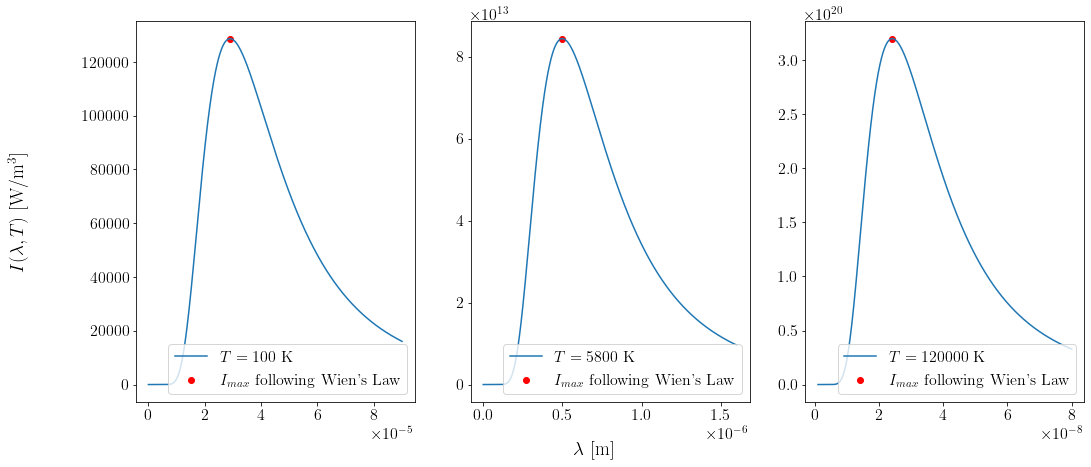

In [191]:
fig,ax = plt.subplots(1,3,figsize=(17,7))
graph_0 = ax[0]
graph_1 = ax[1]
graph_2 = ax[2]

graph_0.plot(lambda_0, planck_0, label=r"$T = 100$ K")
graph_0.scatter(lambda_max[0],max_intensity[0], label=r"$I_{max}$ following Wien's Law", color="red")
graph_1.plot(lambda_1, planck_1, label=r"$T = 5800$ K")
graph_1.scatter(lambda_max[1],max_intensity[1], label=r"$I_{max}$ following Wien's Law", color="red")
graph_2.plot(lambda_2, planck_2, label=r"$T = 120000$ K")
graph_2.scatter(lambda_max[2],max_intensity[2], label=r"$I_{max}$ following Wien's Law", color="red")

fig.supylabel(r"$I(\lambda,T)$ [W/m$^3$]")
fig.supxlabel(r"$\lambda$ [m]")

graph_0.legend()
graph_1.legend()
graph_2.legend()